# FDA and Vaccines
Notebook accompanying this blog post
https://chris-said.io/2021/07/25/fda-and-vaccines/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
sns.set_style('whitegrid')

In [3]:
blue = np.array([58., 195., 242.]) / 255
pink = np.array([237., 38., 133.]) / 255
gray = np.array([150, 150, 150]) / 255
lightgray = np.array([200, 200, 200]) / 255
orange = np.array([245, 128, 50]) / 255
yellow = np.array([241, 211, 33]) / 255
red = np.array([237, 18, 98]) / 255
green = np.array([18, 237, 157]) / 255

In [4]:
n = 300_000_000
years = np.arange(2021, 2031)

In [5]:
def logistic(x, height=1, offset=2023, sharpness=1):
    return height / (1 + np.exp(-sharpness*(x-offset)))

def vax_logistic(x, ymin, ymax, xmid, sharpness):
    height = ymax-ymin
    return ymin + logistic(x, height=height, offset=xmid, sharpness=sharpness)

In [6]:
slow_baseline = [.50, .65, .65, .65, .65, .65, .65, .65, .65, .65] 
fast_baseline = [.65, .65, .65, .65, .65, .65, .65, .65, .65, .65]

slow_moderate = np.concatenate(([0.5], vax_logistic(np.arange(2022, 2031), ymin=0.4, ymax=0.60, xmid=2025, sharpness=1)))
fast_moderate = np.concatenate(([0.65], vax_logistic(np.arange(2022, 2031), ymin=0.36, ymax=0.60, xmid=2025, sharpness=1)))

slow_major = np.concatenate(([0.5], vax_logistic(np.arange(2022, 2031), ymin=0.3, ymax=0.60, xmid=2027, sharpness=1)))
fast_major = np.concatenate(([0.65], vax_logistic(np.arange(2022, 2031), ymin=0.26, ymax=0.60, xmid=2027, sharpness=1)))

In [32]:
p_baseline = 0.85
p_moderate = 0.14
p_major = 0.01

In [33]:
net_baseline = int(np.round(n*(np.sum(fast_baseline) - np.sum(slow_baseline))))
print(f'Net Baseline: {net_baseline:,}')

Net Baseline: 45,000,000


In [34]:
net_moderate = int(np.round(n*(np.sum(fast_moderate) - np.sum(slow_moderate))))
print(f'Net Moderate: {net_moderate:,}')

Net Moderate: 2,703,851


In [35]:
net_major = int(np.round(n*(np.sum(fast_major) - np.sum(slow_major))))
print(f'Net Major {net_major:,}')

Net Major -20,703,851


In [36]:
net_weighted = int(np.round(p_baseline * net_baseline + p_moderate * net_moderate + p_major * net_major))
print(f'Net Weighted: {net_weighted:,}')

Net Weighted: 38,421,501


### Alternative calculation
This shows how the indifference point is only reached if you 5x the long term risks

In [12]:
short_term = (p_baseline * (fast_baseline[0] - slow_baseline[0]) +
              p_moderate * (fast_moderate[0] - slow_moderate[0]) +
              p_major * (fast_major[0] - slow_major[0]))
long_term  = (p_baseline * (np.sum(fast_baseline[1:]) - np.sum(slow_baseline[1:])) +
              p_moderate * (np.sum(fast_moderate[1:]) - np.sum(slow_moderate[1:])) +
              p_major * (np.sum(fast_major[1:]) - np.sum(slow_major[1:])))



In [13]:
print(f'Net Weighted: {int(n*short_term) + int(n*long_term):,}')

Net Weighted: 38,556,694


In [14]:
# Weight the long term costs by 5x
scale = 5.435
print(f'Net Weighted: {int(n*short_term) + int(scale*n*long_term):,}')

Net Weighted: 1,878


### Plots

In [15]:
fig_dir = '/Users/chrissaid/Dropbox/Blogs and Blog Material/csaid.github.io/assets/2021_fda_and_vaccines'

In [36]:
def plot_ts(slow, fast, show_annotation=False):
    sns.set_style('whitegrid')
    plt.figure(figsize=[10, 4])
    plt.plot(years, fast, color=pink, alpha=.5, label='Fast Approval in 2021', zorder=99)
    plt.plot(years, slow, color=blue, alpha=.5, label='Slow Approval in 2021', zorder=99)
    plt.scatter(years, fast, alpha=.5, color=pink, zorder=99)
    plt.scatter(years, slow, alpha=.5, color=blue, zorder=99)
    plt.legend(fontsize=16)
    plt.ylim([0.2, 0.8])
    plt.yticks(fontsize=16)
    plt.xticks(years, fontsize=16)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.ylabel('Percent vaccinating each year', fontsize=16)
    plt.xlabel('Year', fontsize=16)
    
    annotate_y = slow[1]+.05
    if show_annotation:
        plt.annotate('Safety issues emerge\nabout 2021 vax\n(Unlikely!)', 
                     xy=(2022, annotate_y), 
                     xytext=(2022, .65), 
                     ha='center',
                     color=gray, 
                     fontsize=16,
                     bbox=dict(facecolor='w', edgecolor='w'),
                     arrowprops=dict(facecolor=lightgray, edgecolor=lightgray, shrink=0.05))
    plt.tight_layout()


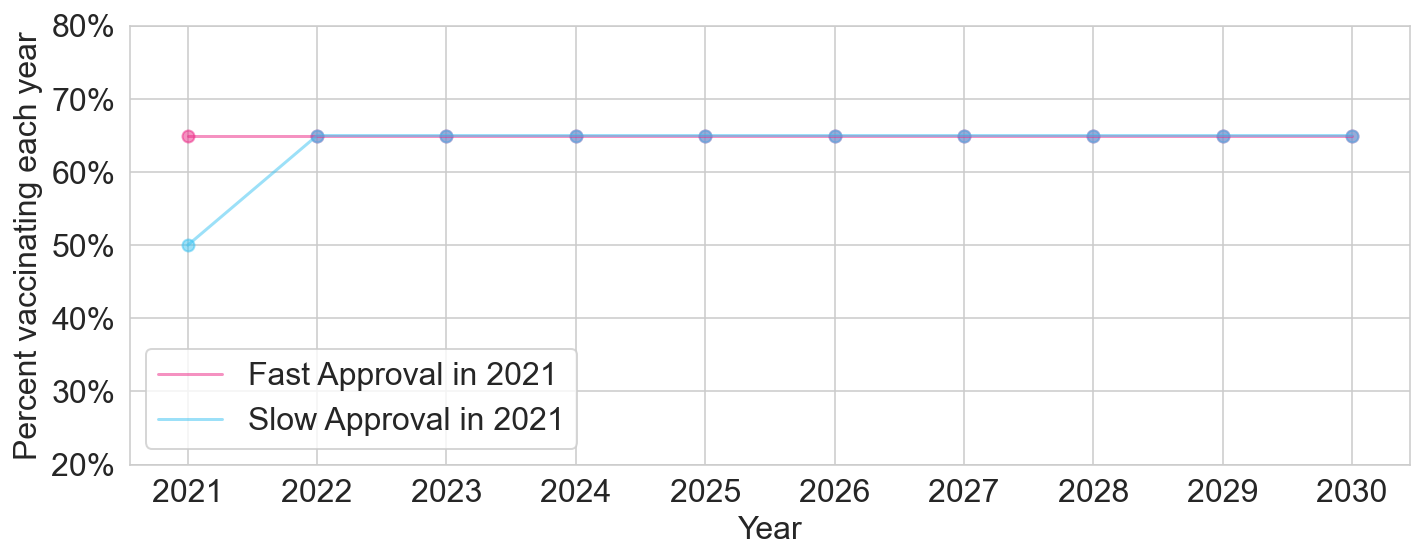

In [37]:
plot_ts(slow_baseline, fast_baseline)
plt.savefig(f'{fig_dir}/fig_baseline.png', dpi=150)

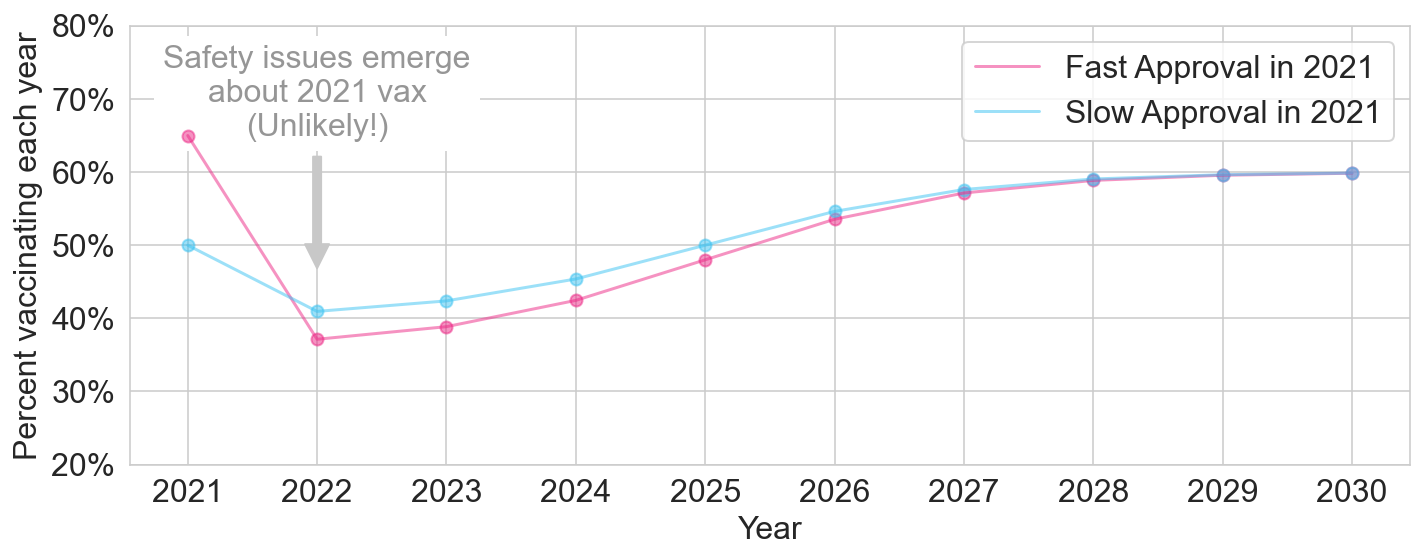

In [38]:
plot_ts(slow_moderate, fast_moderate, show_annotation=True)
plt.savefig(f'{fig_dir}/fig_moderate.png', dpi=150)

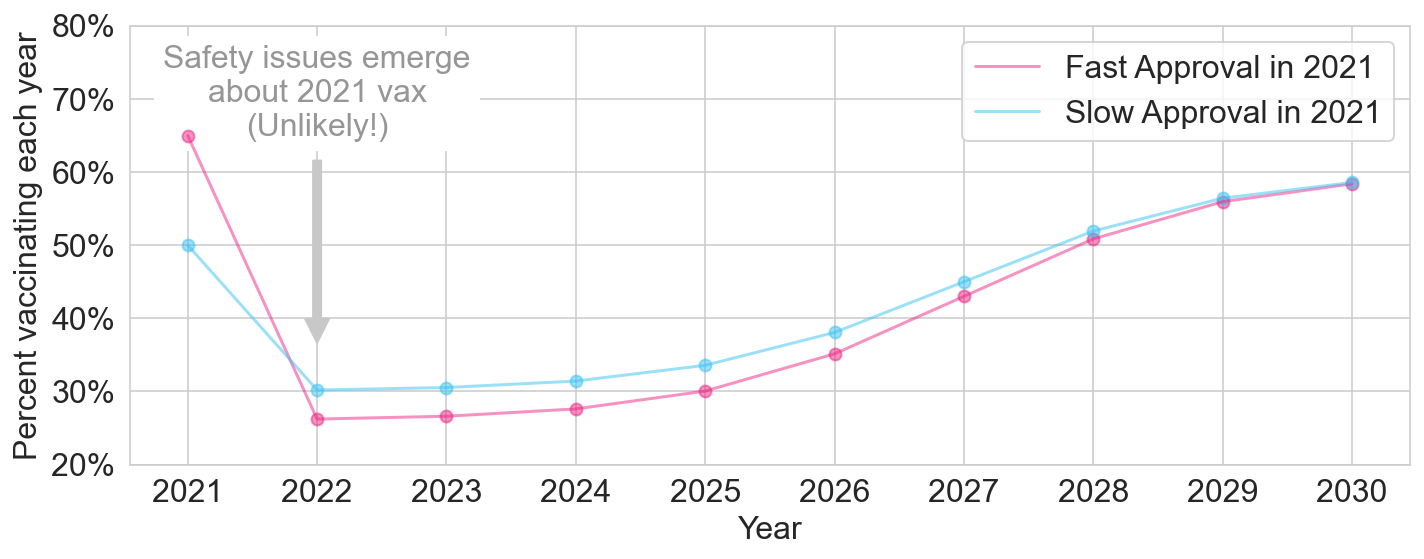

In [39]:
plot_ts(slow_major, fast_major, show_annotation=True)
plt.savefig(f'{fig_dir}/fig_major.png', dpi=150)

## Policy plots

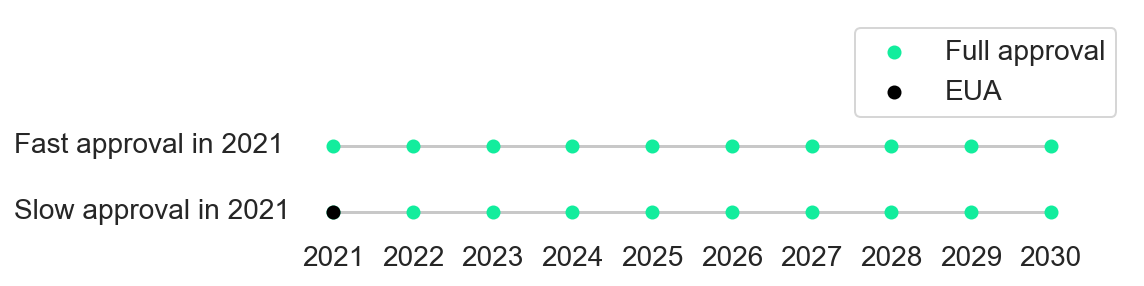

In [35]:
plt.figure(figsize=[10, 2])
sns.set_style('white')
plt.plot(years, np.zeros(len(years)), color=lightgray)
plt.plot(years, np.ones(len(years)), color=lightgray)
plt.scatter(years, np.zeros(len(years)), color=green, zorder=99)
plt.scatter(years, np.ones(len(years)), color=green, zorder=99, label='Full approval')
plt.scatter([years[0]], [0], color='k', label='EUA', zorder=100)
sns.despine(left=True, bottom=True)
plt.legend(loc='upper right', fontsize=14)
plt.ylim([-0.3, 3])
plt.xlim([2017.0, 2031])
plt.text(2017.0, 0, 'Slow approval in 2021', va='center', fontsize=14)
plt.text(2017.0, 1, 'Fast approval in 2021', va='center', fontsize=14)

plt.yticks([])
plt.xticks(np.arange(2021, 2031), fontsize=14);
plt.savefig(f'{fig_dir}/fig_policies.png', dpi=150)